<a href="https://colab.research.google.com/github/mwelland/ENGPHYS_3NM4/blob/main/SHAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear systems

Linear system solvers are the workhorse of scientific computing, and includes the canonical *solve*.

E.g. the trivial equation for $x$ with scalars $a$ and $b$:

$ax = b$

$x=b/a$

> In contrast: $x^2 = 1$ is nonlinear.

A more complicated example, but still linear, is when you have multiple equations and unknowns:

\begin{align}
a x + b y &= e \\
c x + d y &= f
\end{align}

The goal is to find the $x$ and $y$ that fullfill these equations simultaneously.

In general, if you have as many equations as unknowns, you *might* be able to solve it!

What's the worst that could happen?

## Question 1: Consistent systems

You are organizing a fundraising event and need to buy chairs and tables. Chairs cost \$20 each and tables cost \$50 each. You have a budget of \$700 and need a total of 20 pieces of furniture (chairs and tables combined). How many chairs and tables should you buy?

Let's write this problem mathematicall. Let $c$ and $t$ be the number of chairs and tables respectively.

The budget and pieces equations are,

(1) $20 c + 50 t = 700$

(2) $  c+t = 20$

Note that these are lines! Let's plot them!

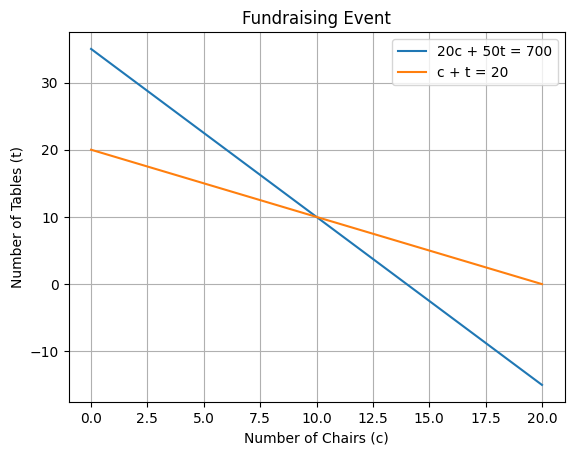

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Define the x values
c = np.linspace(0, 20, 100)

# Calculate the y values for the first equation (20c + 50t = 700)
t1 = (700 - 50 * c) / 20

# Calculate the y values for the second equation (c + t = 20)
t2 = 20 - c

# Plot the lines
plt.plot(c, t1, label='20c + 50t = 700')
plt.plot(c, t2, label='c + t = 20')

# Add labels and title
plt.xlabel('Number of Chairs (c)')
plt.ylabel('Number of Tables (t)')
plt.title('Fundraising Event')

# Add a grid, legend and plot
plt.grid(True)
plt.legend()
plt.show()


## Question 2 - Consistent, dependent systems

There is now a discount on tables down to \$20 each. The customer heard about it and cut your budget to \$400.

The problem is now:

\begin{align}
20c+20t&=700 \\
c+t&=20
\end{align}

Go solve it!

## Question 3 - Inconsistent systems

WOOPS! The customer only has $500! The discount still applies though.

The problem is now

\begin{align}
20 c + 20 t &= 500\\
c+t &= 20
\end{align}

Go solve it!

## Question 4 - Overdetermined systems

The discount is over and the client found the original $700.

BUT, now there is a time crunch! Chairs take 50 minutes to make, tables take 20min and you only have 700 min!

The problem is now

\begin{align}
20 c + 50 t &= 700\\
c+t &= 20 \\
50 c + 20 t &= 700\\
\end{align}

Go solve it!

## Question 5 - The one you'll actually encounter!

Say you only have 600 mintues...

The problem is now

\begin{align}
20 c + 50 t &= 700\\
c+t &= 20 \\
50 c + 20 t &= 600\\
\end{align}

*Can* you solve it?

### The *best* solution

Clearly there isn't a single solution. The system is *inconsistent*. However, we can (uninquely) define the *best* which balances each solution.

In [2]:
import numpy as np

A = np.array([[20, 50],
              [1, 1],
              [50, 20]])

b = np.array([700, 20, 600])

solution, _, _, _ = np.linalg.lstsq(A, b)

display(solution)


array([ 7.61933905, 10.95267238])

# Curve fitting

Curve fitting is a tremendously useful tool both to understand what is happening and what will happen.

You do an experiment (e.g. height vs time) and get data:

| Time (s) | Height (m) |
|---|---|
| 0 | 0 |
| 1 | 5 |
| 2 | 15 |

You want to understand what the height would be at any other time, between or in the future.

What you are actually saying is that $h(t)$, and

\begin{align}
h(0) &= 0 \\
h(1) &= 5 \\
h(2) &= 15
\end{align}

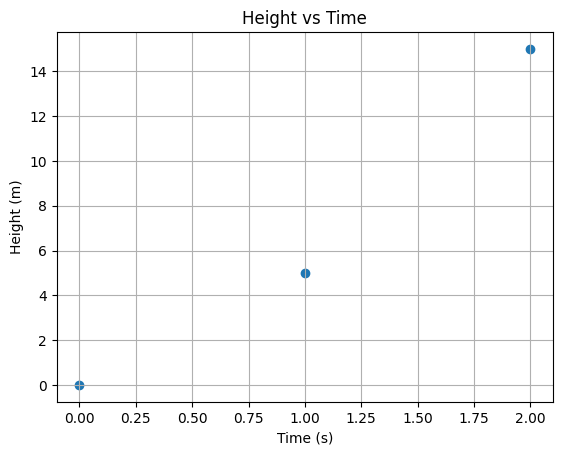

In [3]:
import matplotlib.pyplot as plt

time = [0, 1, 2]
height = [0, 5, 15]

plt.scatter(time, height)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time')
plt.grid(True)
plt.show()

## Fit a line

Assume that
$$ h(t) = a + b t $$

Looking at the data, we can say:

\begin{align}
h(0) = a + b \cdot 0  &= 0 \\
h(1) = a + b \cdot 1  &= 5 \\
h(2) = a + b \cdot 2  &= 15 \\
\end{align}

If we only had two data points, we could fit $a$ and $b$ exactly.

BUT we have 3 data points (or more!) what now?

Least squares fit parameters: a = -0.8333333333333368, b = 7.500000000000002


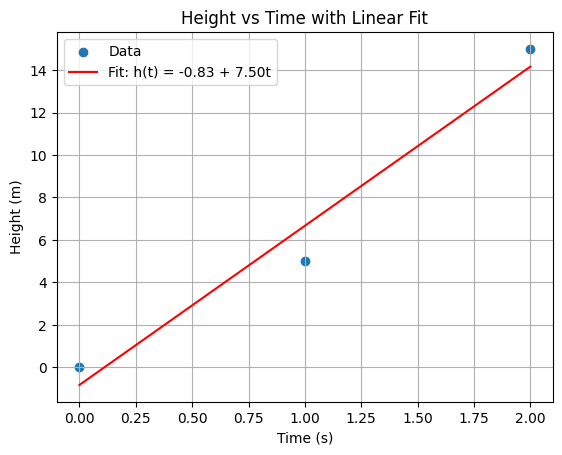

In [6]:
# prompt: do a least squares fit for a and b from the fit a line block

import matplotlib.pyplot as plt
import numpy as np
# We want to fit the model h(t) = a + b*t to the data points.
# This can be written in matrix form as:
# [[1, time[0]], [1, time[1]], [1, time[2]]] * [a, b] = [height[0], height[1], height[2]]
# Let A = [[1, time[0]], [1, time[1]], [1, time[2]]] and x = [a, b] and y = [height[0], height[1], height[2]]
# We want to solve Ax = y for x in a least-squares sense.

A_fit = np.array([[1, time[0]],
                  [1, time[1]],
                  [1, time[2]]])

y_fit = np.array(height)

fit_params, residuals, rank, singular_values = np.linalg.lstsq(A_fit, y_fit, rcond=None)

a_fit, b_fit = fit_params

print(f"Least squares fit parameters: a = {a_fit}, b = {b_fit}")

# Plot the original data and the fitted line
plt.scatter(time, height, label='Data')
t_range = np.linspace(min(time), max(time), 100)
plt.plot(t_range, a_fit + b_fit * t_range, color='red', label=f'Fit: h(t) = {a_fit:.2f} + {b_fit:.2f}t')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time with Linear Fit')
plt.grid(True)
plt.legend()
plt.show()

Is this a good fit? Why / why not?

## Fit to a parabola



Okay, well we can use a better curve! Try a parabola:
$$ h = a + b t + c t^2$$

Looking at the data, we can say:

\begin{align}
h(0) = a + b \cdot 0 + c \cdot 0^2 &= 0 \\
h(1) = a + b \cdot 1 + c \cdot 1^2 &= 5 \\
h(2) = a + b \cdot 2 + c \cdot 2^2 &= 15 \\
\end{align}

or,

\begin{align}
h(0) = a &= 0 \\
h(1) = a + b + c  &= 5 \\
h(2) = a + 2b + 4 c &= 15 \\
\end{align}

Behold a linear system for $a$, $b$, and $c$! We know how to solve these!

Parabola fit parameters: a = 0.0, b = 2.5, c = 2.5


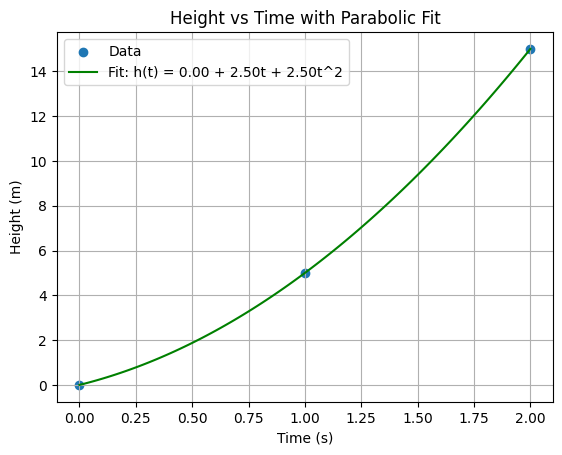

In [7]:
# prompt: Solve the 'fit a parabola case and plot along with the data points

import matplotlib.pyplot as plt
import numpy as np
# We want to fit the model h(t) = a + b*t + c*t^2 to the data points.
# This can be written in matrix form as:
# [[1, time[0], time[0]**2], [1, time[1], time[1]**2], [1, time[2], time[2]**2]] * [a, b, c] = [height[0], height[1], height[2]]
# Let A = [[1, time[0], time[0]**2], [1, time[1], time[1]**2], [1, time[2], time[2]**2]] and x = [a, b, c] and y = [height[0], height[1], height[2]]
# We want to solve Ax = y for x. Since we have as many equations as unknowns, we can use np.linalg.solve.

A_parabola = np.array([[1, time[0], time[0]**2],
                       [1, time[1], time[1]**2],
                       [1, time[2], time[2]**2]])

y_parabola = np.array(height)

parabola_params = np.linalg.solve(A_parabola, y_parabola)

a_parabola, b_parabola, c_parabola = parabola_params

print(f"Parabola fit parameters: a = {a_parabola}, b = {b_parabola}, c = {c_parabola}")

# Plot the original data and the fitted parabola
plt.scatter(time, height, label='Data')
t_range_parabola = np.linspace(min(time), max(time), 100)
plt.plot(t_range_parabola, a_parabola + b_parabola * t_range_parabola + c_parabola * t_range_parabola**2, color='green', label=f'Fit: h(t) = {a_parabola:.2f} + {b_parabola:.2f}t + {c_parabola:.2f}t^2')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time with Parabolic Fit')
plt.grid(True)
plt.legend()
plt.show()

## Fit to a polynomial

If we have more data, we can *always* use a higher-order polynomial:

$$ h = a + b t + c t^2 + d t^3 + e t^4 ...$$

BUT there is a problem! Use the widget below to see what happens!

# Neural networks

Neural networks are powerful *general* functions - i.e.: they aren't polynomials, trignometric, exponential or anything like that. Their nonlinear structure is flexible enough to capture very complex functions (like language!)

Each internal element has parameters:


*   Edges
*   Neuron activation
*   Neuron bias



Colored_neural_network.svg

How do we find the parameters?

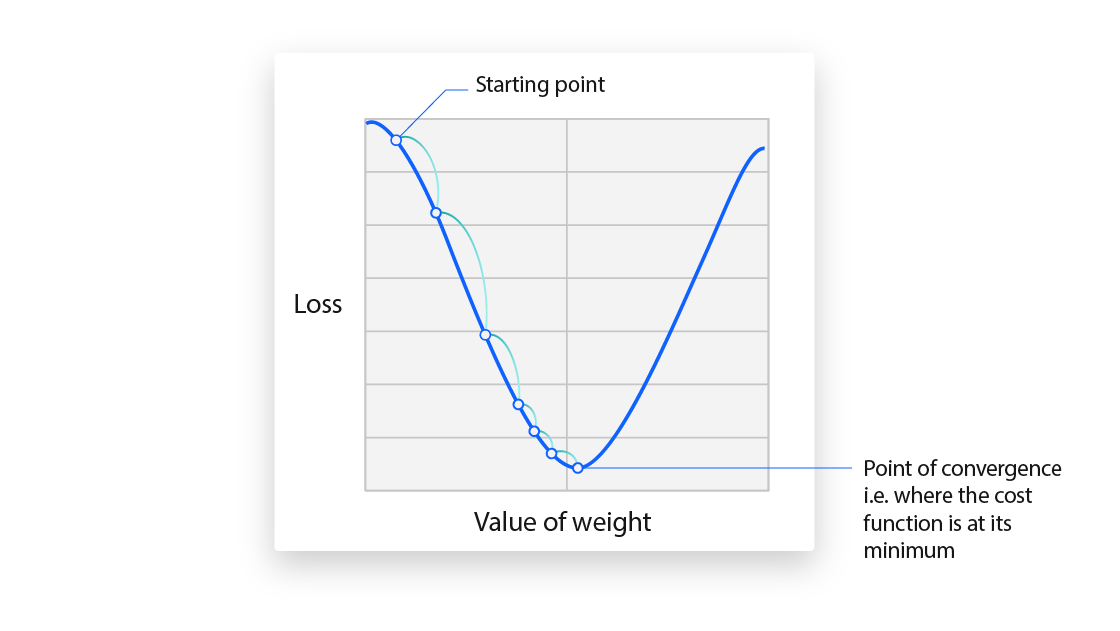